**Importing necessary libraries**

In [269]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import chi2_contingency
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.linear_model import LogisticRegression as SK_LogisticRegression
from typing import List
from sklearn.neural_network import MLPClassifier as MLP_Classifier
import geopandas as gpd

### Data Exploration

We will explore the full dataset for a better understanding of its structure and key characteristics.
The attributes that we will work with are:

- fnl:	Social-economic characteristic of the population the individual belongs to
- hpw:	Number of working hours per week
- relation:	Type of relationship the individual is involved in
- gain:	Capital gain
- country:	Country of origin
- job:	Occupation of the individual
- edu_int:	Number of years of education
- years:	Age of the individual
- loss:	Capital loss
- work_type:	Type of occupation
- partner:	Type of partner the individual has
- edu:	Type of education of the individual
- gender:	Gender of the individual
- race:	Race of the individual
- prod:	Capital production
- gtype:	Type of employment contract

As it can be seen, most of data is of type 'object' and the rest of it of type 'int64'. In this section we will also get a basic statistic of the columns and also only for categorical values. 

After this we will focus on missing values to have an idea of the preprocessing of the dataset. There are **800 missing values for the number of working hours per week (hpw) and for the gender of the individual (gender)***.

In [270]:
full_dataset = pd.read_csv('tema2_SalaryPrediction/SalaryPrediction_full.csv')

# printing the first 10 rows of the dataset
print(full_dataset.head(10))

      fnl   hpw relation  gain        country                job  edu_int  \
0  264627  40.0     NotM     0  United-States       Adm-clerical       10   
1  151369  40.0     NotF     0  United-States       Craft-repair        9   
2  188615  60.0        H     0  United-States              Sales       13   
3  151089  55.0        H     0  United-States    Exec-managerial       10   
4  177625  40.0     NotF     0  United-States  Machine-op-inspct        9   
5  444089  40.0     NotF     0  United-States              Sales        7   
6  101320  75.0     NotF     0  United-States    Exec-managerial       14   
7   35411  40.0     NotF     0  United-States  Machine-op-inspct        9   
8   93235  25.0     OwnC     0  United-States      Other-service        8   
9  232855  37.0     NotM     0  United-States      Other-service       10   

   years  loss work_type partner  edu gender   race  prod gtype  money  
0     38     0      Priv       D   SC    NaN  White    77    DC  <=50K  
1     

In [271]:
# printing the data types for a better understanding of the dataset
print(full_dataset.dtypes)

fnl            int64
hpw          float64
relation      object
gain           int64
country       object
job           object
edu_int        int64
years          int64
loss           int64
work_type     object
partner       object
edu           object
gender        object
race          object
prod           int64
gtype         object
money         object
dtype: object


The dataset contains numerical values with the following characteristics:

#### `fnl` (Social-economic characteristic of the population)
- **Count**: 9999
- **Mean**: 190,352.9
- **Standard Deviation**: 106,070.9
- **Min**: 19,214
- **25th Percentile**: 118,282.5
- **Median (50th Percentile)**: 178,472
- **75th Percentile**: 237,311
- **Max**: 1,455,435
- **Interpretation**: The `fnl` attribute has a wide range, with values varying from 19,214 to 1,455,435. The mean and median are relatively close, suggesting a somewhat symmetric distribution, but the high standard deviation indicates significant variability.

#### `hpw` (Number of working hours per week)
- **Count**: 9199
- **Mean**: 40.42
- **Standard Deviation**: 12.52
- **Min**: 1
- **25th Percentile**: 40
- **Median (50th Percentile)**: 40
- **75th Percentile**: 45
- **Max**: 99
- **Interpretation**: The `hpw` attribute shows that the majority of individuals work around 40 hours per week, with the median and 25th percentile at 40 hours. The standard deviation is 12.52, indicating some variation, and there are outliers working as few as 1 hour or as many as 99 hours per week.

#### `gain` (Capital gain)
- **Count**: 9999
- **Mean**: 979.85
- **Standard Deviation**: 7003.80
- **Min**: 0
- **25th Percentile**: 0
- **Median (50th Percentile)**: 0
- **75th Percentile**: 0
- **Max**: 99,999
- **Interpretation**: The `gain` attribute has a highly skewed distribution, with most individuals having no capital gain (as indicated by the 25th, 50th, and 75th percentiles all being 0). However, the maximum value is 99,999, and the high standard deviation suggests that a few individuals have very high capital gains.

#### `edu_int` (Number of years of education)
- **Count**: 9999
- **Mean**: 14.26
- **Standard Deviation**: 24.77
- **Min**: 1
- **25th Percentile**: 9
- **Median (50th Percentile)**: 10
- **75th Percentile**: 13
- **Max**: 206
- **Interpretation**: The `edu_int` attribute has an unusual distribution with some extremely high values (up to 206 years of education), likely indicating data entry errors or outliers. The mean is 14.26 years, but the median is lower at 10 years, suggesting a right-skewed distribution.

#### `years` (Age of the individual)
- **Count**: 9999
- **Mean**: 38.65
- **Standard Deviation**: 13.75
- **Min**: 17
- **25th Percentile**: 28
- **Median (50th Percentile)**: 37
- **75th Percentile**: 48
- **Max**: 90
- **Interpretation**: The `years` attribute represents ages ranging from 17 to 90, with a mean age of 38.65. The distribution appears fairly balanced, with the median close to the mean.

#### `loss` (Capital loss)
- **Count**: 9999
- **Mean**: 84.11
- **Standard Deviation**: 394.04
- **Min**: 0
- **25th Percentile**: 0
- **Median (50th Percentile)**: 0
- **75th Percentile**: 0
- **Max**: 3,770
- **Interpretation**: Similar to capital gain, the `loss` attribute is highly skewed, with most individuals having no capital loss. The high maximum value and standard deviation indicate that a small number of individuals have significant capital losses.

#### `prod` (Capital production)
- **Count**: 9999
- **Mean**: 2014.93
- **Standard Deviation**: 14,007.60
- **Min**: -28
- **25th Percentile**: 42
- **Median (50th Percentile)**: 57
- **75th Percentile**: 77
- **Max**: 200,125
- **Interpretation**: The `prod` attribute has a very wide range, with values from -28 to 200,125, indicating possible errors or outliers. The mean is 2014.93, which is much higher than the median of 57, suggesting a heavily right-skewed distribution with significant outliers.

This analysis helps in understanding the characteristics of the numeric features, which is essential for making informed decisions during the data preprocessing and modeling stages.


In [272]:
# getting a general overview of the dataset: count, mean, std, min, 25%, 50%, 75%, max
print(full_dataset.describe())

                fnl          hpw          gain      edu_int        years  \
count  9.999000e+03  9199.000000   9999.000000  9999.000000  9999.000000   
mean   1.903529e+05    40.416241    979.853385    14.262026    38.646865   
std    1.060709e+05    12.517356   7003.795382    24.770835    13.745101   
min    1.921400e+04     1.000000      0.000000     1.000000    17.000000   
25%    1.182825e+05    40.000000      0.000000     9.000000    28.000000   
50%    1.784720e+05    40.000000      0.000000    10.000000    37.000000   
75%    2.373110e+05    45.000000      0.000000    13.000000    48.000000   
max    1.455435e+06    99.000000  99999.000000   206.000000    90.000000   

              loss           prod  
count  9999.000000    9999.000000  
mean     84.111411    2014.927593  
std     394.035484   14007.604496  
min       0.000000     -28.000000  
25%       0.000000      42.000000  
50%       0.000000      57.000000  
75%       0.000000      77.000000  
max    3770.000000  200125.

The dataset contains several categorical features with the following characteristics:

### `relation`:
- Unique values: 6
- Most common value: H (4097 occurrences)

### `country`:
- Unique values: 41
- Most common value: United-States (8978 occurrences)

### `job`: 
- Unique values: 14
- Most common value: Craft-repair (1277 occurrences)

### `work_type`:
- Unique values: 9
- Most common value: Priv (6940 occurrences)

### `partner`:
- Unique values: 7
- Most common value: MCS (4667 occurrences)

### `edu`:
- Unique values: 16
- Most common value: HSG (3178 occurrences)

### `gender`:
- Unique values: 2
- Most common value: M (6179 occurrences)

### `race`:
- Unique values: 5
- Most common value: White (8588 occurrences)

### `gtype`:
- Unique values: 2
- Most common value: AC (6711 occurrences)

### `money (target variable)`:
- Unique values: 2
- Most common value: <=50K (7591 occurrences)

In [273]:
print(full_dataset.describe(include=['object']))

       relation        country           job work_type partner   edu gender  \
count      9999           9999          9999      9999    9999  9999   9199   
unique        6             41            14         9       7    16      2   
top           H  United-States  Craft-repair      Priv     MCS   HSG      M   
freq       4097           8978          1277      6940    4667  3178   6179   

         race gtype  money  
count    9999  9999   9999  
unique      5     2      2  
top     White    AC  <=50K  
freq     8588  6711   7591  


In [274]:
# getting the number of missing values for each column
print(full_dataset.isnull().sum())

fnl            0
hpw          800
relation       0
gain           0
country        0
job            0
edu_int        0
years          0
loss           0
work_type      0
partner        0
edu            0
gender       800
race           0
prod           0
gtype          0
money          0
dtype: int64


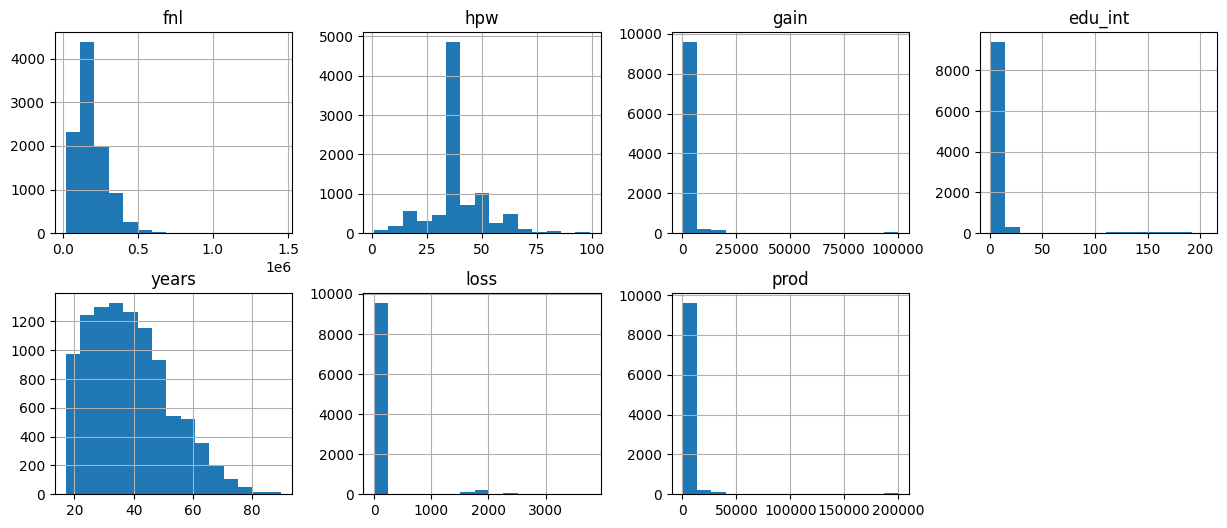

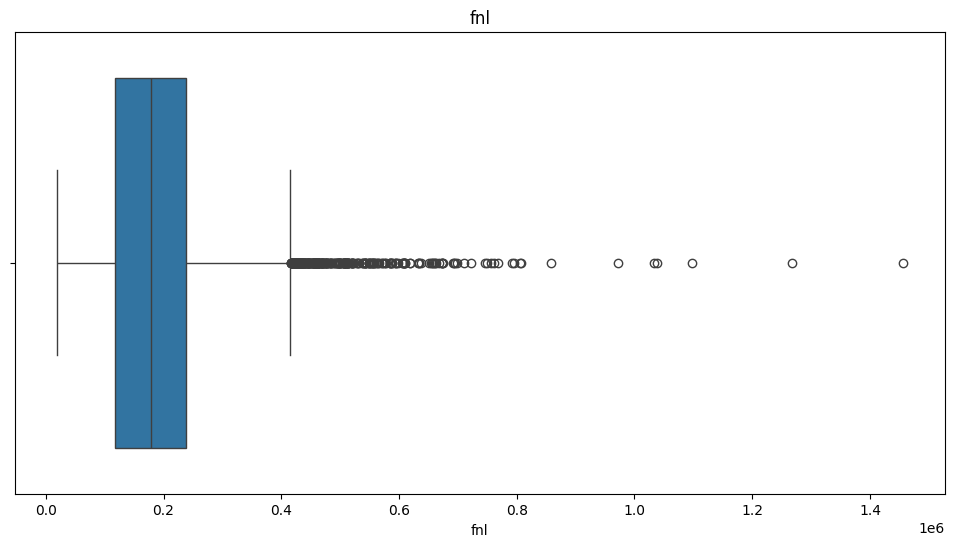

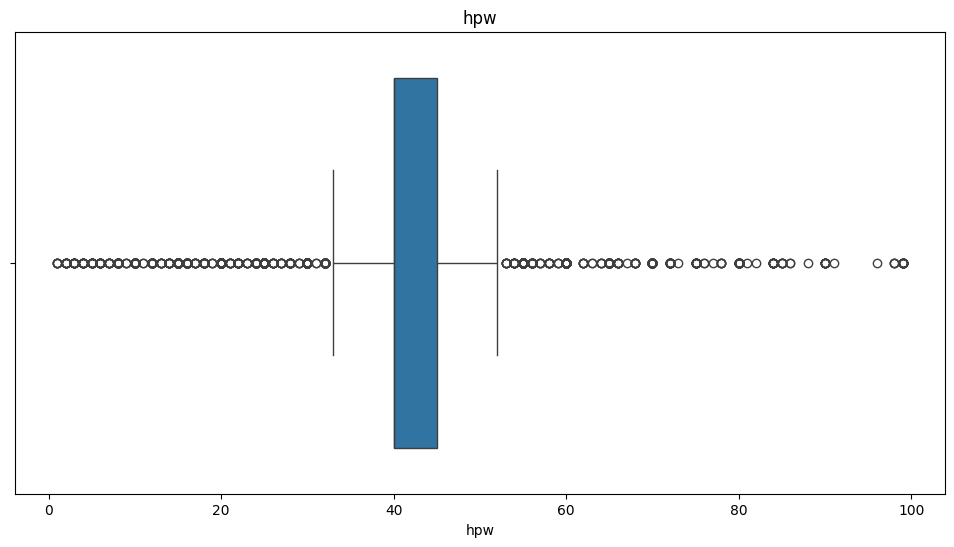

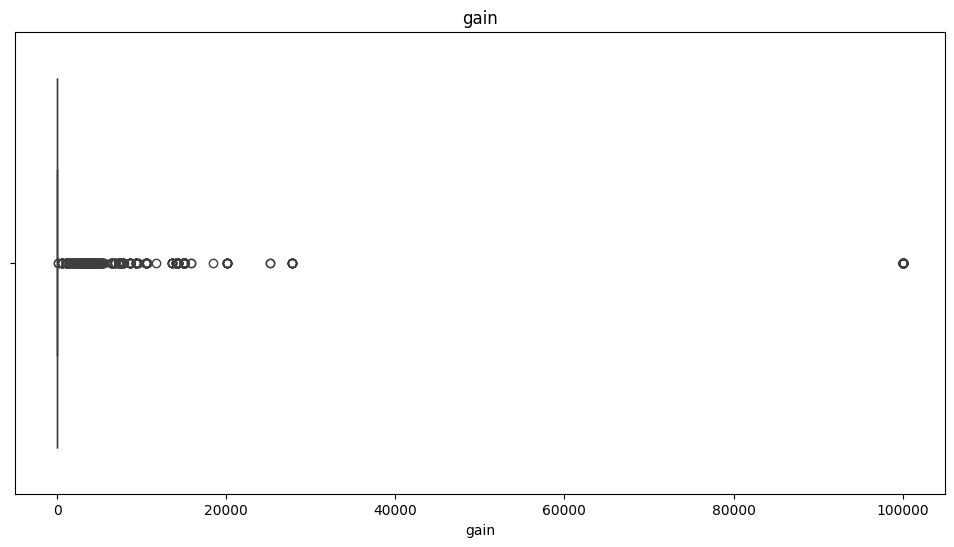

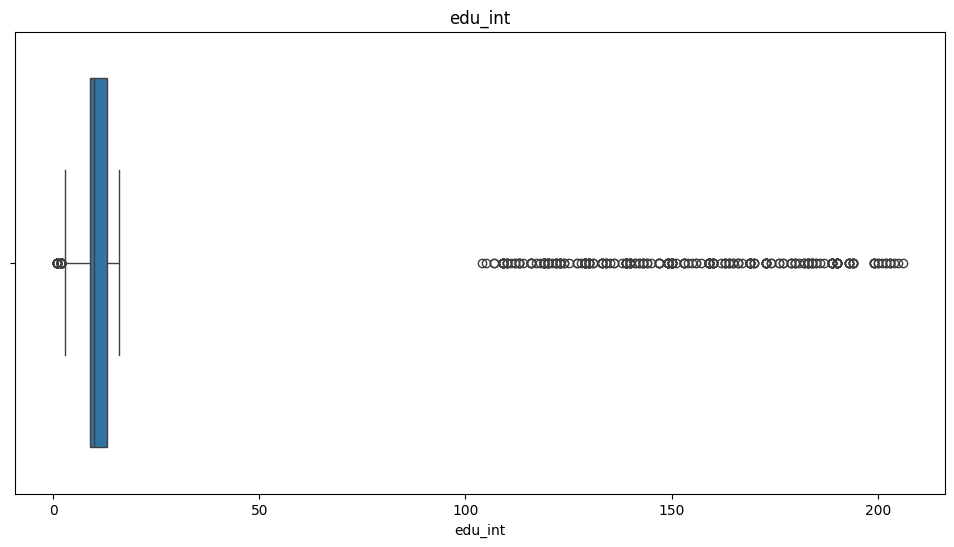

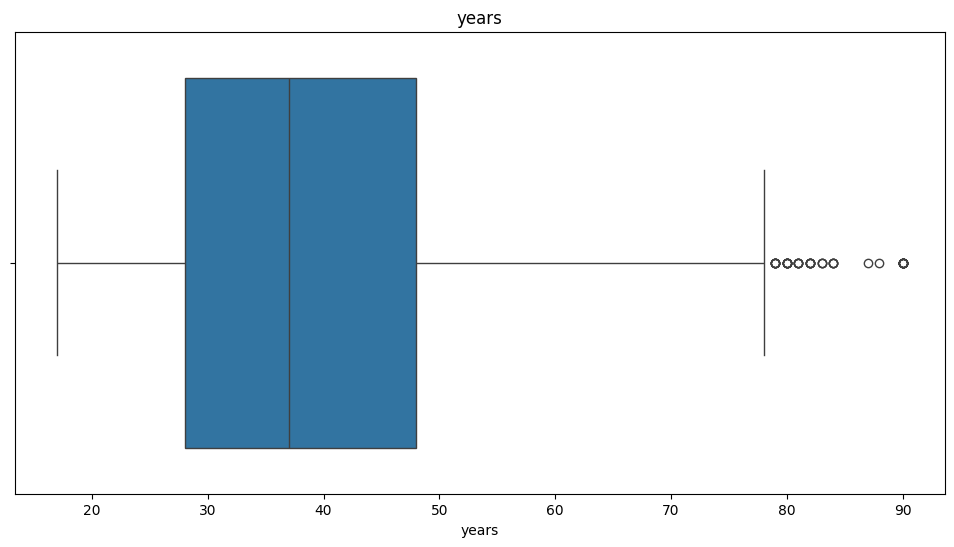

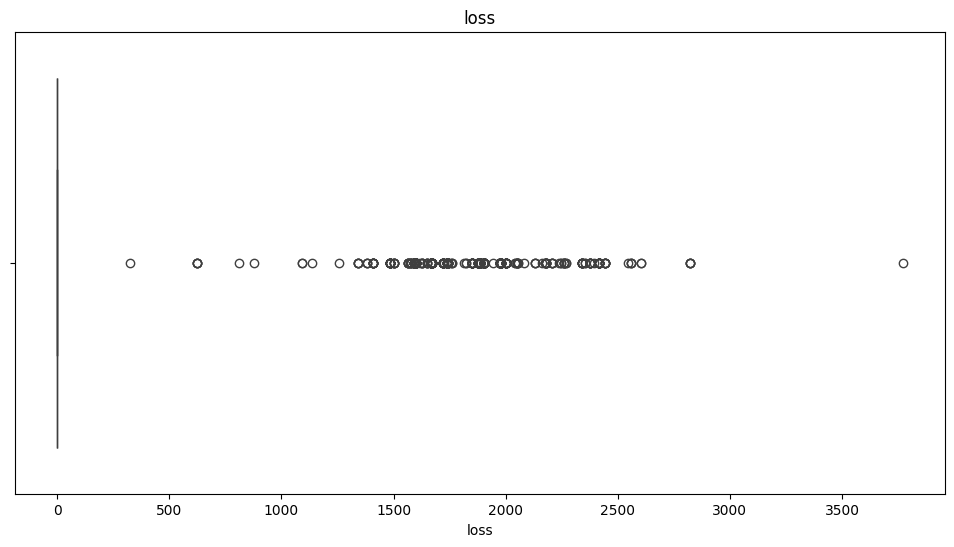

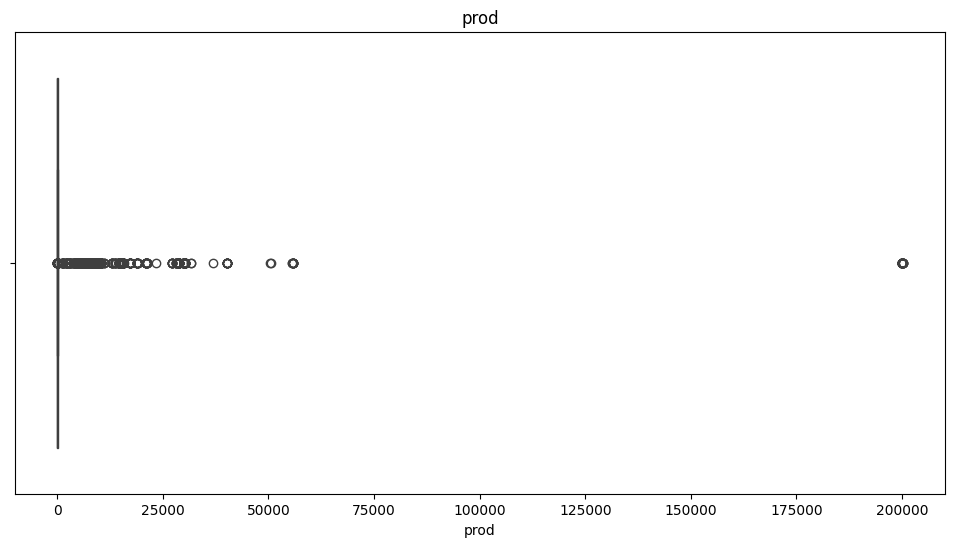

In [275]:
# selecting numerical and categorical columns in 2 lists
numerical_columns = full_dataset.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_columns = full_dataset.select_dtypes(include='object').columns.tolist()

full_dataset[numerical_columns].hist(bins=15, figsize=(15, 6), layout=(2, 4), ) # getting histograms for numerical columns
plt.show()

for column in numerical_columns:
    plt.figure(figsize=(12, 6))
    sns.boxplot(x=full_dataset[column])
    plt.title(column)
    plt.show()

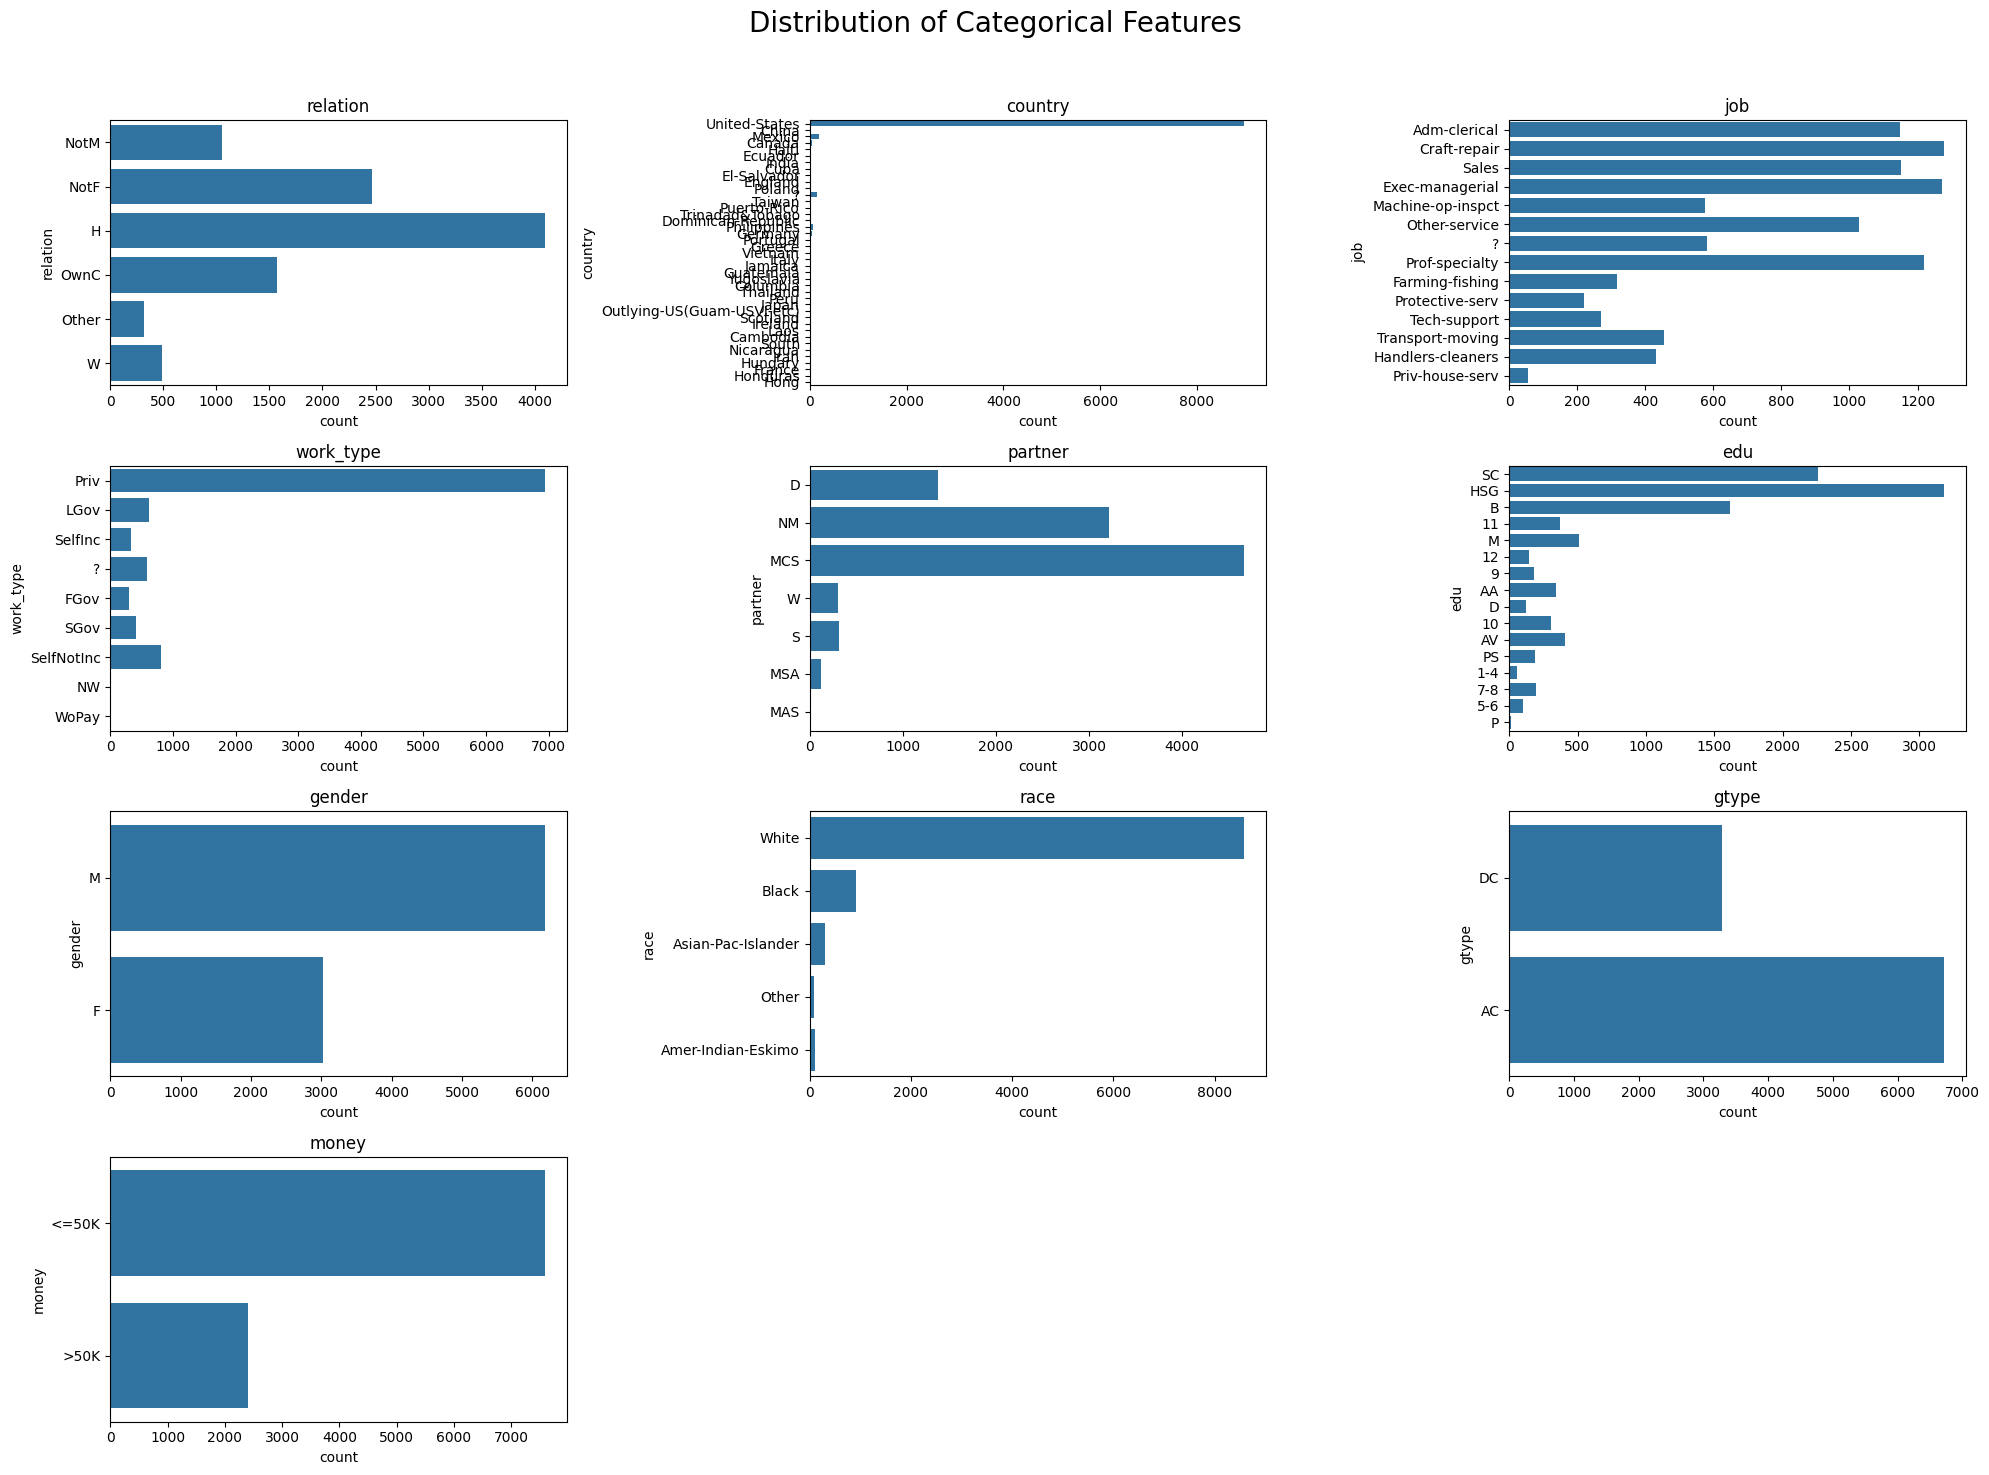

In [276]:
# analyzing the categorical columns
num_cols = 3
num_rows = (len(categorical_columns) + num_cols - 1) // num_cols

# Create subplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(20, 15))
fig.suptitle('Distribution of Categorical Features', fontsize=20)

axes = axes.flatten()

for i, column in enumerate(categorical_columns):
    sns.countplot(y=column, data=full_dataset, ax=axes[i])
    axes[i].set_title(column)

# unused plots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

### Splitting into categorical, binary, numerical, and ordinal features
Let's see how our dataset is devided.

['relation', 'country', 'job', 'edu_int', 'years', 'work_type', 'partner', 'edu', 'race'] ['gender', 'gtype', 'money'] ['fnl', 'hpw', 'gain', 'edu_int', 'years', 'loss', 'prod'] ['edu_int', 'years']


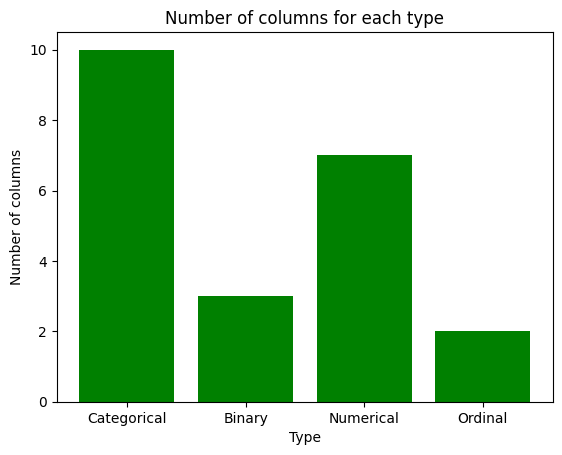

In [277]:
# after watching the dataset, we will split it into those columns

def split_types(data):
    categorical = []
    binary = []
    numerical = []
    ordinal = []
    ordinal.append('edu_int') # manually creating this
    ordinal.append('years')
    for column in data.columns:
        if data[column].nunique() == 2:
            binary.append(column)
        elif pd.api.types.is_numeric_dtype(data[column]) and column not in ordinal:
            numerical.append(column)
        else:
            categorical.append(column)
    
    return categorical, binary, numerical, ordinal

categorical_types, binary_types, numerical_types, ordinal_types = split_types(full_dataset)
print(categorical_types, binary_types, numerical_columns, ordinal_types)

# creating a histogram to see the differences
counts = {
          'Categorical': len(categorical_columns),
          'Binary': len(binary_types),
          'Numerical': len(numerical_columns),
          'Ordinal': len(ordinal_types)
         }
plt.bar(counts.keys(), counts.values(), color='green')
plt.title('Number of columns for each type')
plt.xlabel('Type')
plt.ylabel('Number of columns')
plt.show()



**Correlation Matrix for Numerical Values**

Finally, for a much better understanding of this dataset, we will use a correlation matrix for the numerical values in order to potentially find redundancy.
What we observed:

*low correlations*:
- ***fnl*** and ***hpw*** have a correlation of -0.026, indicating a very weak negative correlation.
- ***fnl*** and ***gain*** have a correlation of 0.004, indicating almost no linear relationship.

*high correlations*:
- ***gain*** and ***prod*** with a correlation of 1, indicating a perfect positive correlation. This suggests that these two features likely represent similar or identical information, making one of them potentially redundant.
- ***hpw*** and ***gain*** with a correlation of 0.097, indicating a weak positive correlation.

*negative correlations*:
- ***years*** and ***fnl*** have a correlation of -0.07, indicating a very weak negative correlation.
- ***loss*** and ***years*** have a correlation of 0.046, which is also a weak positive correlation.

****Summary of correlation matrix:****
The perfect correlation between gain and prod suggests that one of these features might be redundant. This redundancy should be considered during feature selection or model training to avoid multicollinearity.

Most features have weak linear relationships with each other, implying that they might contribute unique information to the model.

The weak correlations suggest that the features are largely independent of each other, which can be beneficial for certain machine learning algorithms that assume feature independence. For example, Naive Bayes assume that the features are independent of each other. This assumption is called the "naive" assumption, and it simplifies the computation and the model. This can be advantageous for algorithms that assume or benefit from independent features, leading to simpler, more interpretable models and potentially better performance in certain cases.

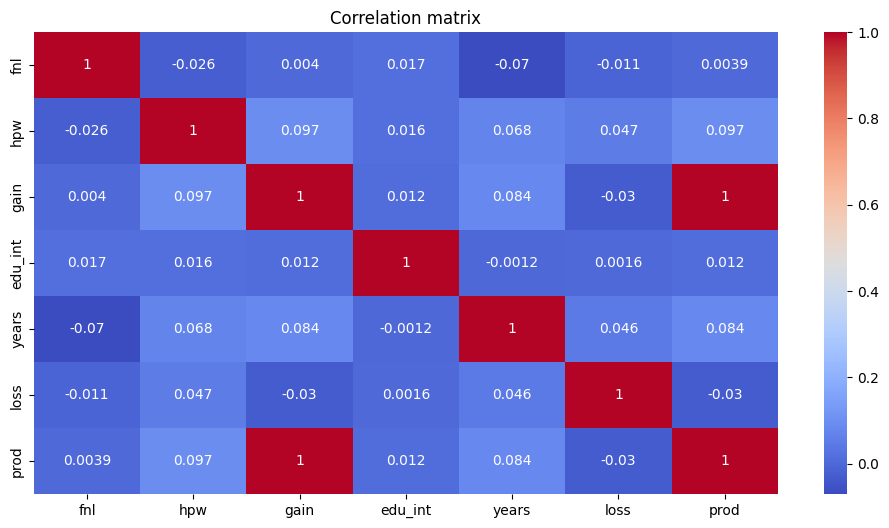

In [278]:
correlation_matrix = full_dataset[numerical_columns].corr()

plt.figure(figsize=(12, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation matrix')
plt.show()

### Interpretation of Correlation Analysis for Categorical Variables

We analyzed the correlations between the categorical variables in the dataset using the Chi-Squared test and visualized the results in heatmaps.

#### P-Value Matrix

- **Significant Associations**:
  - Most pairs of variables have p-values close to 0, indicating statistically significant associations.

- **Non-Significant Associations**:
  - `country` and `work_type` have a p-value of 0.17, suggesting a non-significant relationship.
  - `country` and `gender` have a p-value of 0.0076, which is significant but higher compared to other pairs.

### Summary

1. **Strong Associations**: Strong associations exist between `job` and `work_type`, and `relation` and `partner`.
2. **Statistical Significance**: Most associations are statistically significant.
3. **Potential Non-Significant Associations**: Some pairs, like `country` and `work_type`, do not have a significant association.




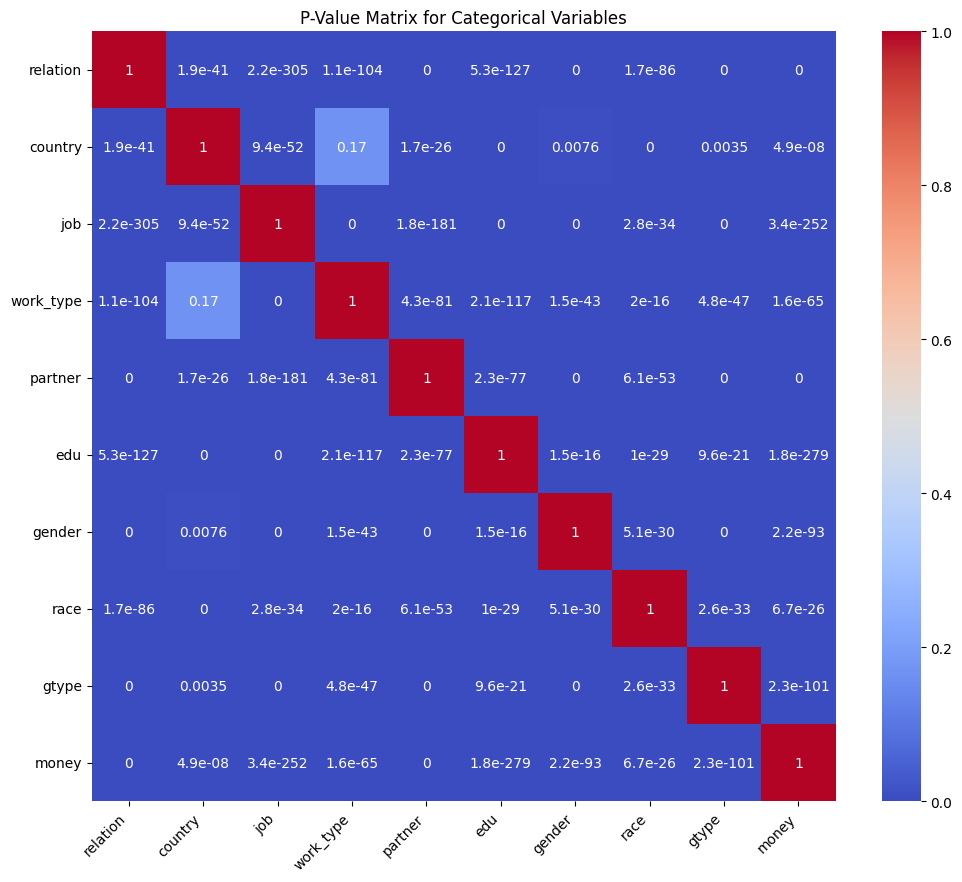

In [279]:
def chi2_correlation_matrix(data, columns):
    chi2_matrix = pd.DataFrame(index=columns, columns=columns)
    p_value_matrix = pd.DataFrame(index=columns, columns=columns)

    for col1 in columns:
        for col2 in columns:
            if col1 == col2:
                chi2_matrix.loc[col1, col2] = 1
                p_value_matrix.loc[col1, col2] = 1
                continue
            
            contingency_table = pd.crosstab(data[col1], data[col2])
            chi2, p, _, _ = chi2_contingency(contingency_table)
            chi2_matrix.loc[col1, col2] = chi2
            p_value_matrix.loc[col1, col2] = p

    chi2_matrix = chi2_matrix.astype(float)
    p_value_matrix = p_value_matrix.astype(float)
    return chi2_matrix, p_value_matrix

chi2_matrix, p_value_matrix = chi2_correlation_matrix(full_dataset, categorical_columns)


plt.figure(figsize=(12, 10))
sns.heatmap(p_value_matrix, annot=True, cmap='coolwarm', vmin=0, vmax=1, xticklabels=p_value_matrix.columns, yticklabels=p_value_matrix.index)
plt.title("P-Value Matrix for Categorical Variables")
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.show()

### Data Preprocessing
In this step we will focus on preprocessing our data:
- handle missing values
- encode categorical varaibles
- scale numeric features
- handle outliers
- feature selection
- split the data into features and target

This process will focus on all datasets (train, test, full).
We will start by dropping some columns that are too corralated with others.

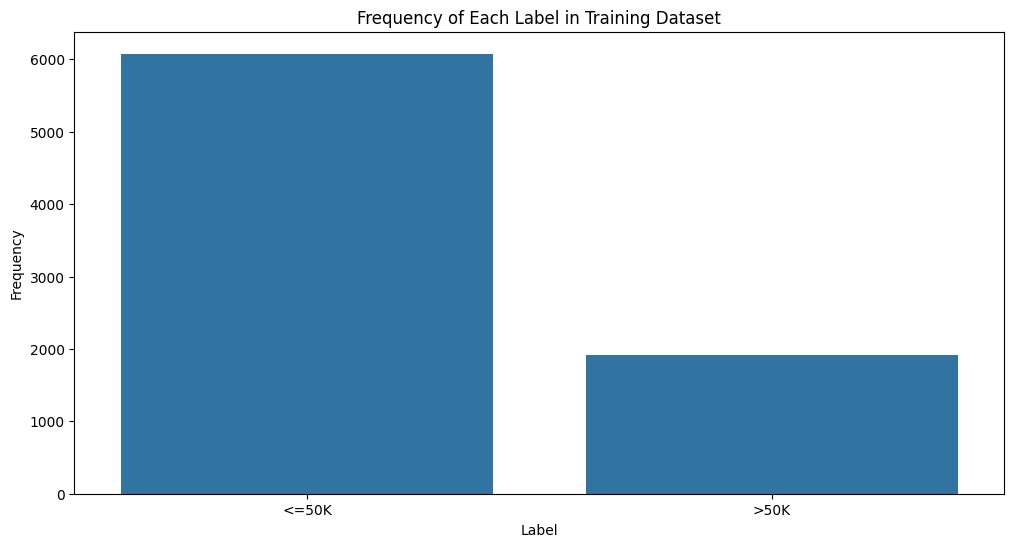

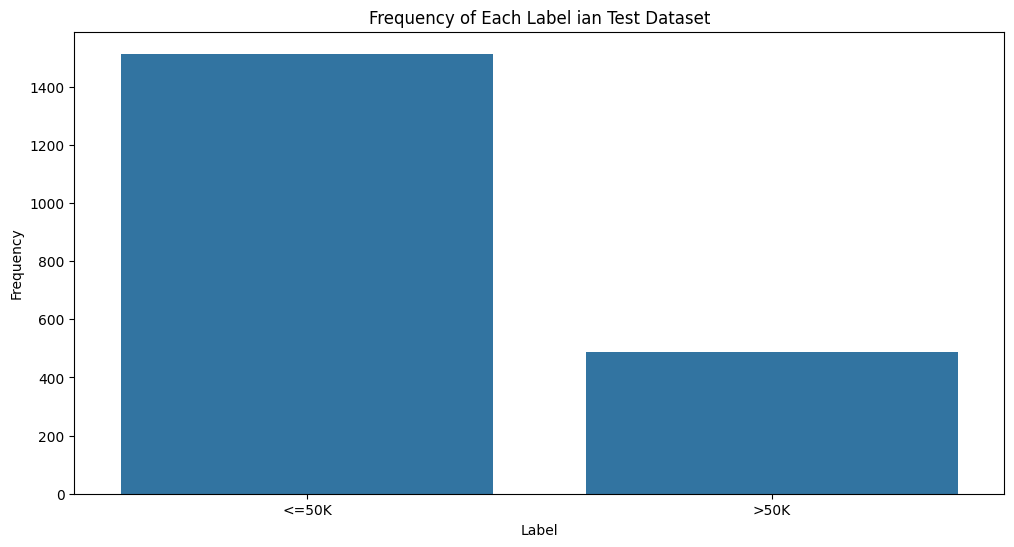

In [280]:
# loading data

train_dataset = pd.read_csv('tema2_SalaryPrediction/SalaryPrediction_train.csv')
test_dataset = pd.read_csv('tema2_SalaryPrediction/SalaryPrediction_test.csv')

# Bar plots for label frequency in training dataset
plt.figure(figsize=(12, 6))
sns.countplot(x='money', data=train_dataset)
plt.title('Frequency of Each Label in Training Dataset')
plt.xlabel('Label')
plt.ylabel('Frequency')
plt.show()

# Bar plots for label frequency in test dataset
plt.figure(figsize=(12, 6))
sns.countplot(x='money', data=test_dataset)
plt.title('Frequency of Each Label ian Test Dataset')
plt.xlabel('Label')
plt.ylabel('Frequency')
plt.show()

# we already know that 'gain' and 'prod' are very correlated, so we can drop one of them
train_dataset.drop(columns=['prod'], inplace=True)
test_dataset.drop(columns=['prod'], inplace=True)
full_dataset.drop(columns=['prod'], inplace=True)

# we will also drop several categorical columns that have a high correlation with other columns
# we will drop 'gender', 'gtype', 'partner', 'work_type', 'edu'
# gender already had too many None values
train_dataset.drop(columns=['partner', 'edu', 'race', 'gtype', 'work_type', 'gender'], inplace=True)
test_dataset.drop(columns=['partner', 'edu', 'race', 'gtype', 'work_type', 'gender'], inplace=True)
full_dataset.drop(columns=['partner', 'edu', 'race', 'gtype', 'work_type', 'gender'], inplace=True)


In [281]:
train_missing = [column for column in train_dataset.columns if train_dataset[column].isnull().any()]
test_missing = [column for column in test_dataset.columns if test_dataset[column].isnull().any()]
full_missing = [column for column in full_dataset.columns if full_dataset[column].isnull().any()]

print("Train missing values:", train_missing)
print("Test missing values:", test_missing)
print("Full missing values:", full_missing)

# we observe that the missing values are in the same columns for both train and test datasets

Train missing values: ['hpw']
Test missing values: []
Full missing values: ['hpw']


In [282]:
# replacing numeric missing values with the mean of the column
train_numeric_columns = train_dataset.select_dtypes(include=['int64', 'float64']).columns.tolist()
train_dataset[train_numeric_columns] = train_dataset[train_numeric_columns].fillna(train_dataset[train_numeric_columns].mean())

# replacing categorical missing values with the most frequent value in the column
train_categorical_columns = train_dataset.select_dtypes(include='object').columns.tolist()
train_dataset[train_categorical_columns] = train_dataset[train_categorical_columns].fillna(train_dataset[train_categorical_columns].mode().iloc[0])
print(train_dataset.isnull().sum())

fnl         0
hpw         0
relation    0
gain        0
country     0
job         0
edu_int     0
years       0
loss        0
money       0
dtype: int64


In [283]:
# doing the same for the full dataset
full_numeric_columns = full_dataset.select_dtypes(include=['int64', 'float64']).columns.tolist()
full_dataset[full_numeric_columns] = full_dataset[full_numeric_columns].fillna(full_dataset[full_numeric_columns].mean())

full_categorical_columns = full_dataset.select_dtypes(include='object').columns.tolist()
full_dataset[full_categorical_columns] = full_dataset[full_categorical_columns].fillna(full_dataset[full_categorical_columns].mode().iloc[0])
print(full_dataset.isnull().sum())

fnl         0
hpw         0
relation    0
gain        0
country     0
job         0
edu_int     0
years       0
loss        0
money       0
dtype: int64


In [284]:
# scaling the numerical columns
scaler = StandardScaler()
train_dataset[full_numeric_columns] = scaler.fit_transform(train_dataset[full_numeric_columns])
test_dataset[full_numeric_columns] = scaler.transform(test_dataset[full_numeric_columns])
full_dataset[full_numeric_columns] = scaler.transform(full_dataset[full_numeric_columns])

print(full_dataset.head(5))

        fnl       hpw relation      gain        country                job  \
0  0.697013 -0.025885     NotM -0.140316  United-States       Adm-clerical   
1 -0.367323 -0.025885     NotF -0.140316  United-States       Craft-repair   
2 -0.017306  1.658206        H -0.140316  United-States              Sales   
3 -0.369955  1.237183        H -0.140316  United-States    Exec-managerial   
4 -0.120584 -0.025885     NotF -0.140316  United-States  Machine-op-inspct   

    edu_int     years      loss  money  
0 -0.166567 -0.052705 -0.204810  <=50K  
1 -0.208469  1.698128 -0.204810  <=50K  
2 -0.040864  0.239101 -0.204810   >50K  
3 -0.166567  0.166149  6.178522   >50K  
4 -0.208469 -1.001073 -0.204810  <=50K  


In [285]:
# starting encoding the categorical columns
encoder = OneHotEncoder(sparse_output=False, drop='first')
encoder.fit(full_dataset[full_categorical_columns])

train_encoded = encoder.transform(train_dataset[train_categorical_columns])
test_encoded = encoder.transform(test_dataset[train_categorical_columns])
full_encoded = encoder.transform(full_dataset[full_categorical_columns])

train_encoded = pd.DataFrame(train_encoded)
test_encoded = pd.DataFrame(test_encoded)
full_encoded = pd.DataFrame(full_encoded)

train_encoded.columns = encoder.get_feature_names_out(train_categorical_columns)
test_encoded.columns = encoder.get_feature_names_out(train_categorical_columns)
full_encoded.columns = encoder.get_feature_names_out(full_categorical_columns)

train_dataset = train_dataset.drop(columns=train_categorical_columns)
train_dataset = pd.concat([train_dataset, train_encoded], axis=1)

test_dataset = test_dataset.drop(columns=train_categorical_columns)
test_dataset = pd.concat([test_dataset, test_encoded], axis=1)

full_dataset = full_dataset.drop(columns=full_categorical_columns)
full_dataset = pd.concat([full_dataset, full_encoded], axis=1)

print(train_dataset.head(5))


        fnl       hpw      gain   edu_int     years      loss  relation_NotF  \
0  0.697013 -0.025885 -0.140316 -0.166567 -0.052705 -0.204810            0.0   
1 -0.367323 -0.025885 -0.140316 -0.208469  1.698128 -0.204810            1.0   
2 -0.017306  1.658206 -0.140316 -0.040864  0.239101 -0.204810            0.0   
3 -0.369955  1.237183 -0.140316 -0.166567  0.166149  6.178522            0.0   
4 -0.120584 -0.025885 -0.140316 -0.208469 -1.001073 -0.204810            1.0   

   relation_NotM  relation_Other  relation_OwnC  ...  job_Handlers-cleaners  \
0            1.0             0.0            0.0  ...                    0.0   
1            0.0             0.0            0.0  ...                    0.0   
2            0.0             0.0            0.0  ...                    0.0   
3            0.0             0.0            0.0  ...                    0.0   
4            0.0             0.0            0.0  ...                    0.0   

   job_Machine-op-inspct  job_Other-service 

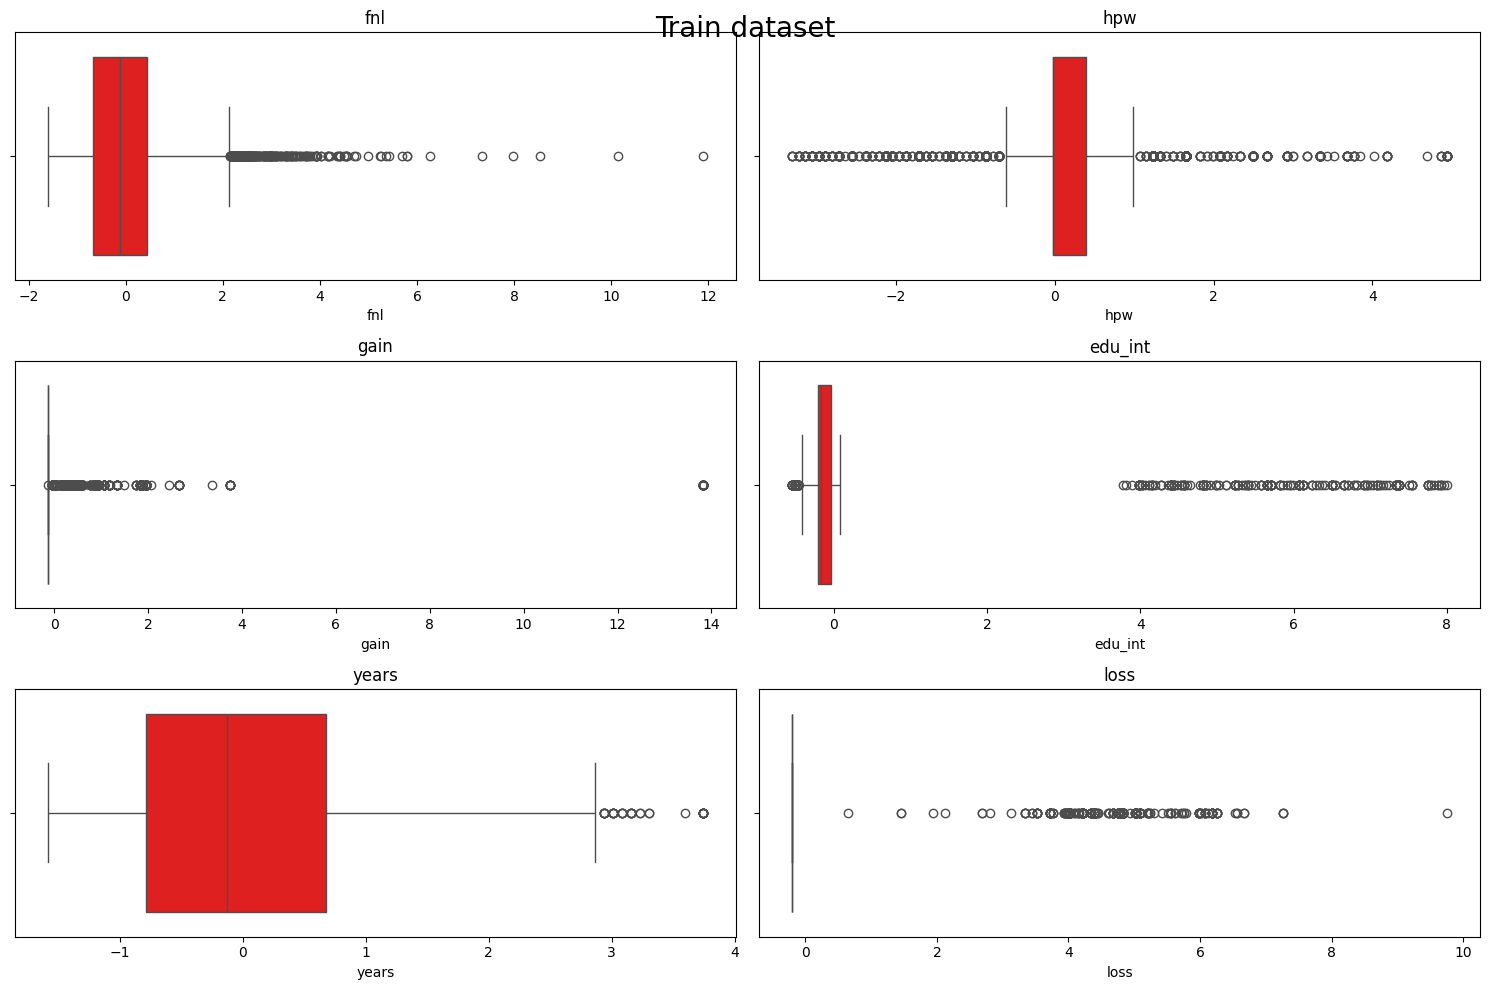

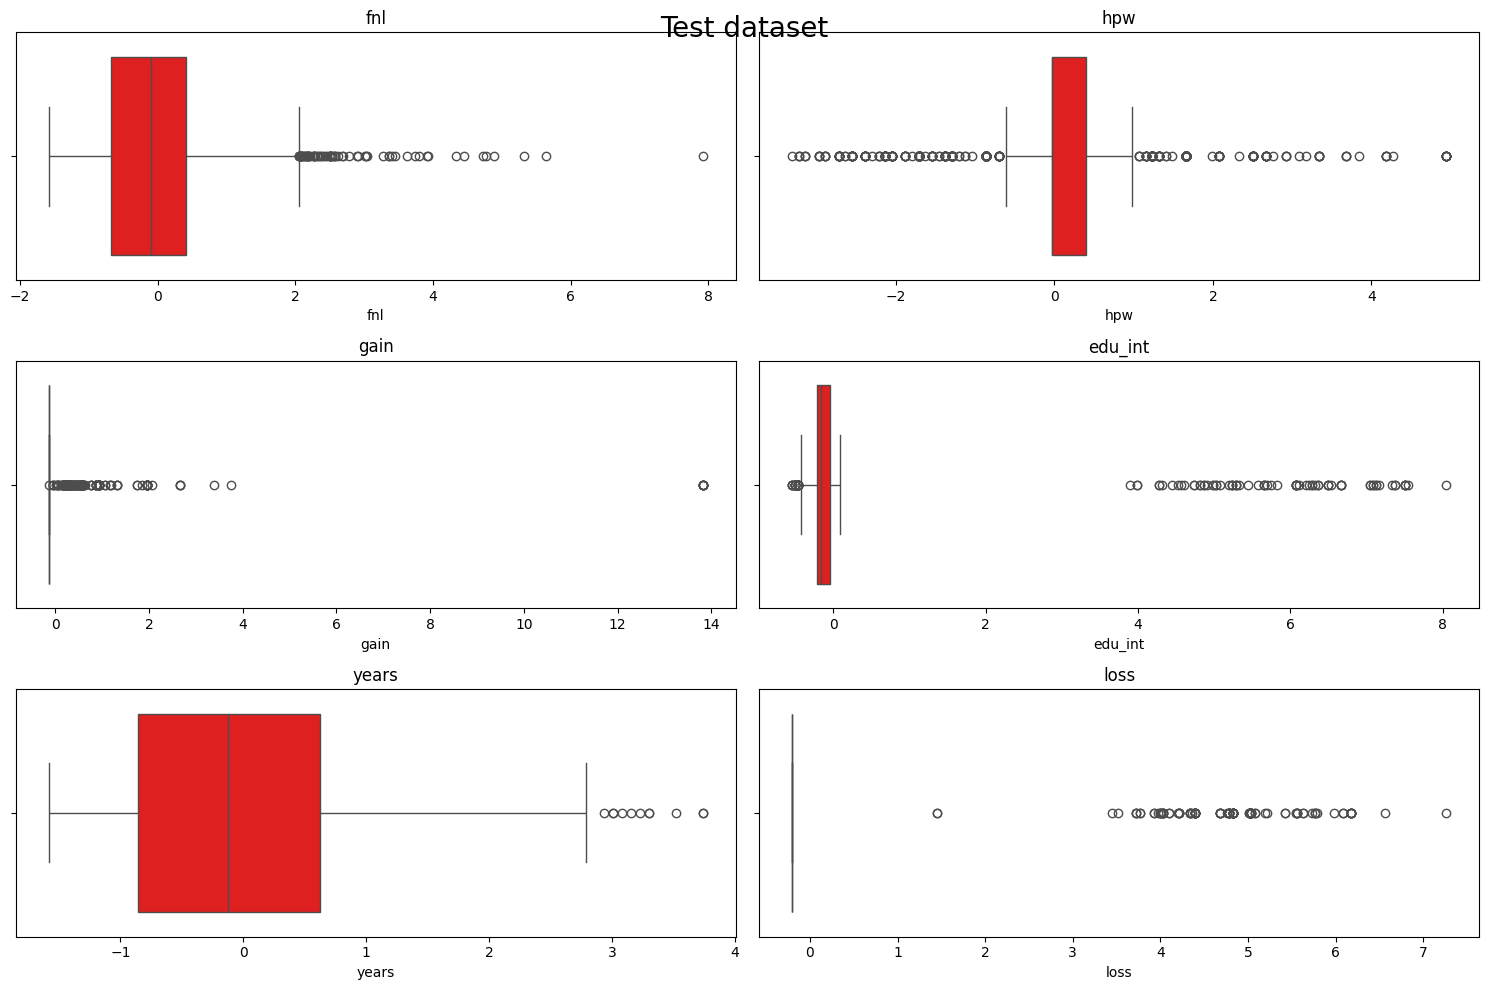

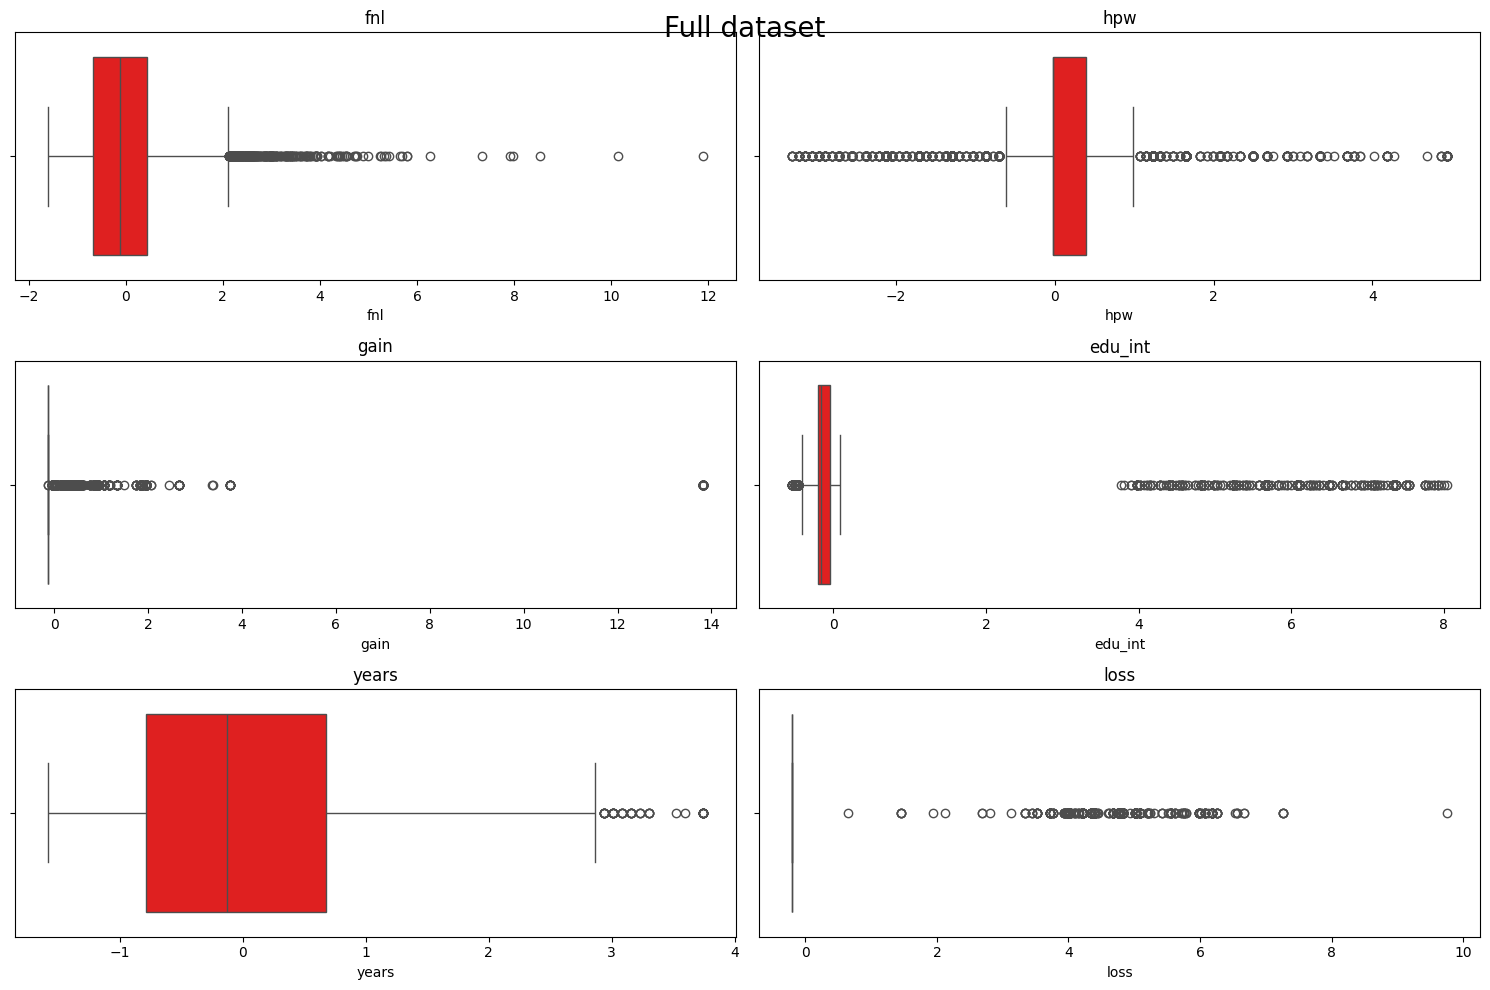

In [286]:
# let's check the plots before removing the outliers
def get_non_binary_columns(data):
    return data.columns[data.nunique() > 2]

def plot_data(data, title):
    columns = get_non_binary_columns(data)
    fig, axes = plt.subplots(nrows=(len(columns) + 1) // 2, ncols=2, figsize=(15, (len(columns) + 1) * 3 // 2))
    axes = axes.flatten()
    for i, column in enumerate(columns):
        sns.boxplot(data[column], ax=axes[i], color='red', orient='h')
        axes[i].set_title(column)
    plt.tight_layout()
    plt.suptitle(title, fontsize=20)
    plt.show()

plot_data(train_dataset, 'Train dataset')
plot_data(test_dataset, 'Test dataset')
plot_data(full_dataset, 'Full dataset')

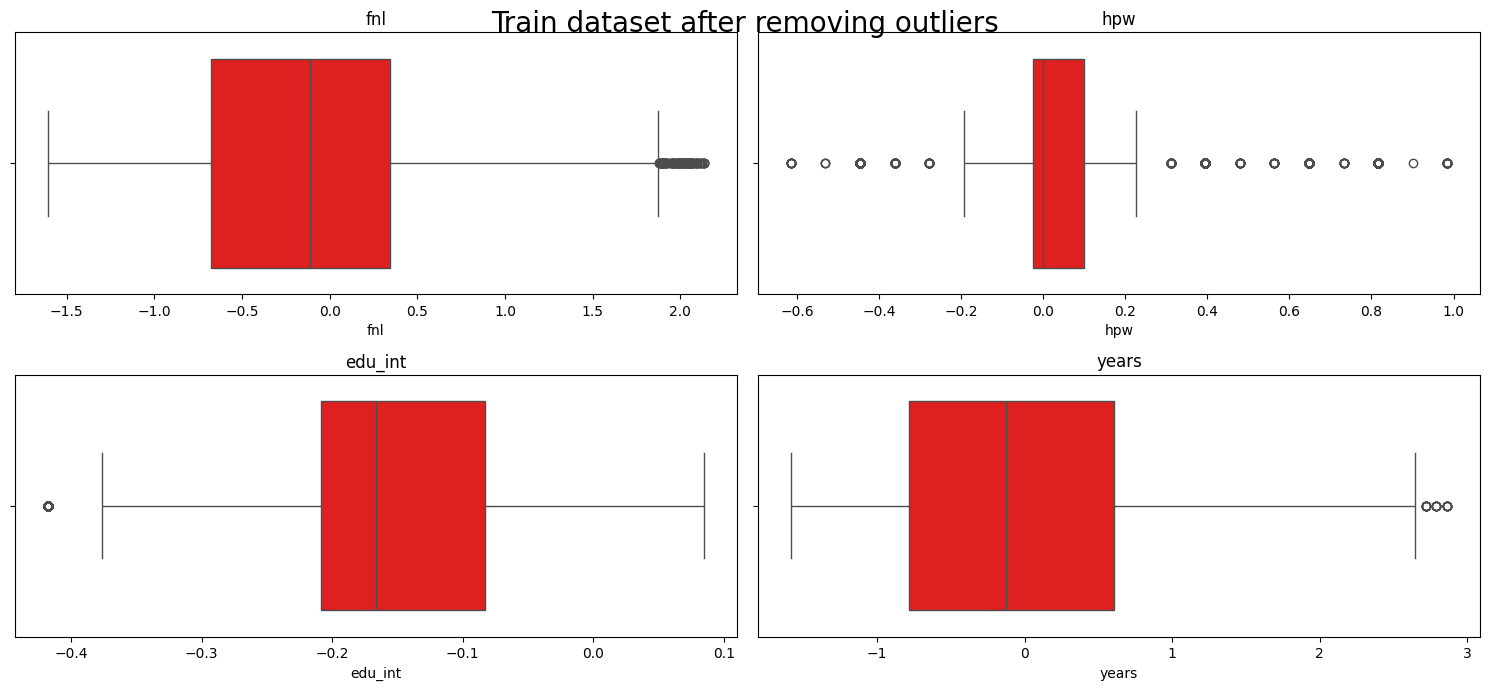

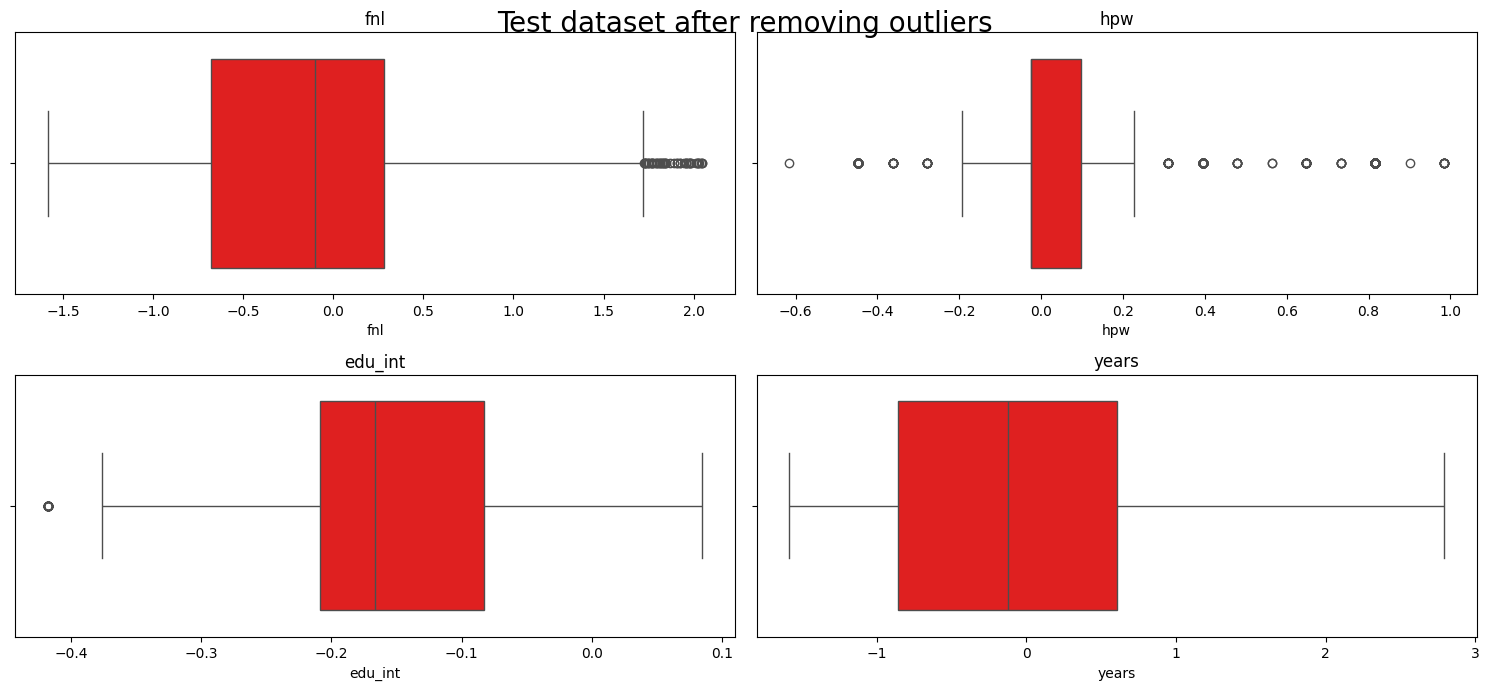

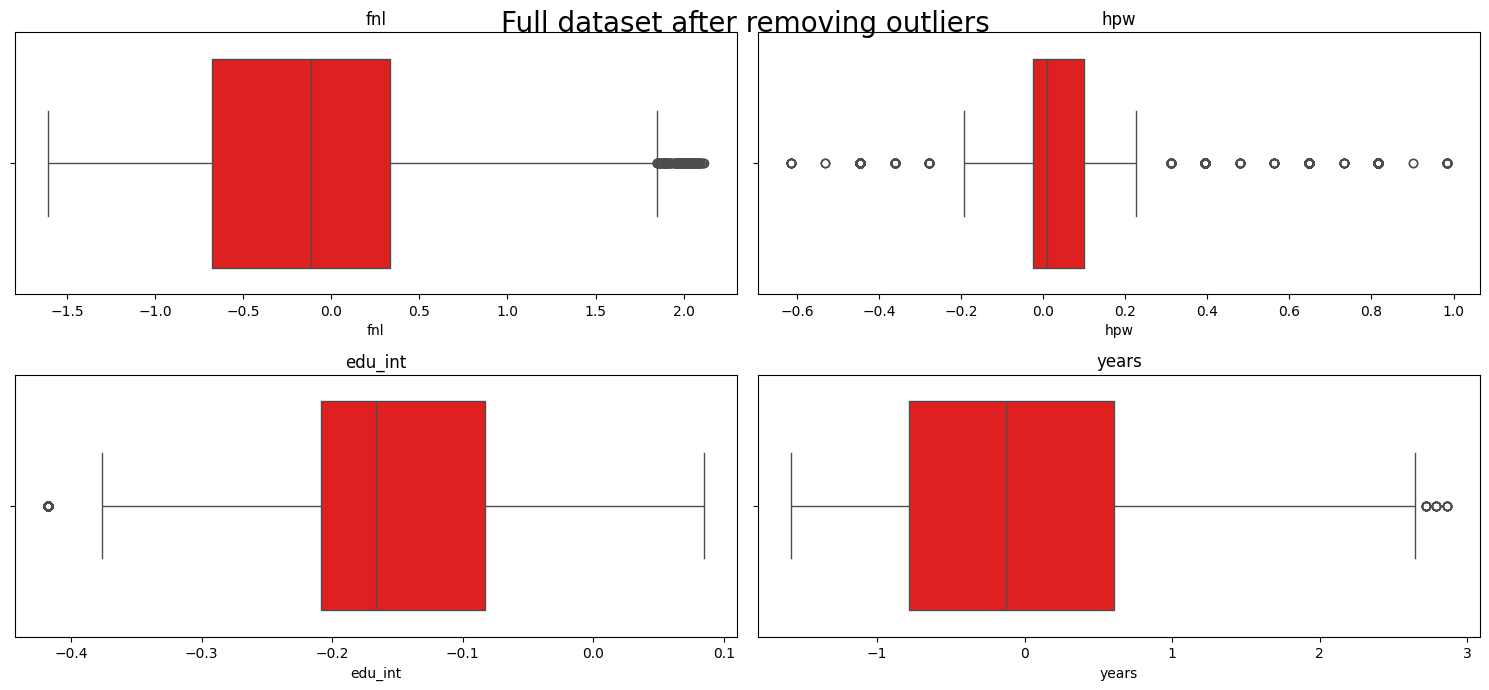

In [287]:
# marking outliers using the IQR method
def mark_outliers(data):
    columns = get_non_binary_columns(data)
    for column in columns:
        if column != 'gain' and column != 'loss':
            Q1 = data[column].quantile(0.25)
            Q3 = data[column].quantile(0.75)
            IQR = Q3 - Q1
            threshold = 1.5
            outliers = data[(data[column] < Q1 - threshold * IQR) | (data[column] > Q3 + threshold * IQR)]
            data.loc[outliers.index, column] = np.nan
    return data

def handle_extra_data(data):
    columns = get_non_binary_columns(data)
    for column in columns:
        if column == 'gain' or column == 'loss':
            Q1 = data[column].quantile(0.2)
            Q3 = data[column].quantile(0.8)
            IQR = Q3 - Q1
            threshold = 1.5
            outliers = data[(data[column] < Q1 - threshold * IQR) | (data[column] > Q3 + threshold * IQR)]
            data.loc[outliers.index, column] = np.nan
    return data

train_dataset = mark_outliers(train_dataset)
test_dataset = mark_outliers(test_dataset)
full_dataset = mark_outliers(full_dataset)
train_dataset = handle_extra_data(train_dataset)
test_dataset = handle_extra_data(test_dataset)
full_dataset = handle_extra_data(full_dataset)



# imputing the missing values with iterative imputer
imputer = SimpleImputer(strategy='mean')
train_dataset[train_dataset.columns] = imputer.fit_transform(train_dataset)
test_dataset[test_dataset.columns] = imputer.transform(test_dataset)
full_dataset[full_dataset.columns] = imputer.transform(full_dataset)


plot_data(train_dataset, 'Train dataset after removing outliers')
plot_data(test_dataset, 'Test dataset after removing outliers')
plot_data(full_dataset, 'Full dataset after removing outliers')

### Training And Results

In the next step we will implement several algorithms for training our model. The algorithms used are:
- Manual Logistic Regression
- Scikit-Learn Logistic Regression
- Manual MLP (Multi Layered Perceptron)
- Scikit-Learn MLP

Accuracy = (TN + TP) / (TN + FP + FN + TP)

#### Results:
- Manual Logistic Regression: `>=81%` Train and Test Accuracy
- Scikit Learn Logistic Regression `>=82%` Train and Test Accuracy
- Manual MLP: `>=82%` Train and Test Accuracy
- Scikit Learn MLP: `>=89%` Train and `>=81%` Test (overfitting ?)

In [288]:
def calculate_precision(confusion_matrix):
    return confusion_matrix[1, 1] / (confusion_matrix[1, 1] + confusion_matrix[0, 1])

def calculate_recall(confusion_matrix):
    return confusion_matrix[1, 1] / (confusion_matrix[1, 1] + confusion_matrix[1, 0])

def calculate_f1_score(confusion_matrix):
    precision = calculate_precision(confusion_matrix)
    recall = calculate_recall(confusion_matrix)
    return 2 * precision * recall / (precision + recall)

### Logistic Regression

In [289]:
# splitting the datasets
target_val = 'money_>50K'
X = full_dataset.drop(columns=target_val)
T = full_dataset[target_val]

X_train = train_dataset.drop(columns=target_val, axis=1)
y_train = train_dataset[target_val]
X_test = test_dataset.drop(columns=target_val)
y_test = test_dataset[target_val]

# adding bias column
X_train = np.concatenate([X_train.values, np.ones((X_train.shape[0], 1))], axis=1)
X_test = np.concatenate([X_test.values, np.ones((X_test.shape[0], 1))], axis=1)
X = np.concatenate([X.values, np.ones((X.shape[0], 1))], axis=1)



In [290]:
# visualizing the dataset function
def visualize_dataset(X, T, Y=None, w=None, other_w=None):
    m = ["x", "o"]  # Indicates true class
    col = ["red", "blue"]  # Indicates prediction
    fig = plt.figure(); plt.axis('equal')
    if Y is not None:
        idx_tp = np.logical_and(T >= .5, Y >= .5) # True positives
        idx_fp = np.logical_and(T < .5, Y >= .5) # False positives
        idx_fn = np.logical_and(T >= .5, Y < .5) # False negatives
        idx_tn = np.logical_and(T < .5, Y < .5) # True negatives
        
        plt.scatter(X[idx_tp,0], X[idx_tp,1], marker=m[0], c="red", label="TP")
        plt.scatter(X[idx_fp,0], X[idx_fp,1], marker=m[1], c="red", label="FP")
        plt.scatter(X[idx_fn,0], X[idx_fn,1], marker=m[0], c="blue", label="FN")
        plt.scatter(X[idx_tn,0], X[idx_tn,1], marker=m[1], c="blue", label="TN")

    else:
        idx_pos, idx_neg = (T > .5), (T < .5)
        plt.scatter(X[idx_pos,0], X[idx_pos,1], marker=m[0], color="blue", label="Pos")
        plt.scatter(X[idx_neg,0], X[idx_neg,1], marker=m[1], color="blue", label="Neg")
    
    if w is not None:
        __x = np.linspace(0, 1, 100)
        __y = -w[0] / w[1] * __x - w[2] / w[1]
        plt.plot(__x, __y, color="black")

    if other_w is not None:
        __x = np.linspace(0, 1, 100)
        __y = -other_w[0] / other_w[1] * __x - other_w[2] / other_w[1]
        plt.plot(__x, __y, color="orange")

    plt.xlabel("x"); plt.ylabel("y")
    plt.legend(bbox_to_anchor=(0, 1), loc='upper left', ncol=1)
    plt.show()

In [291]:
# sigmoid logistic function
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

In [292]:
# logistic predicition function
def predict(X, w):
    return sigmoid(np.dot(X, w))

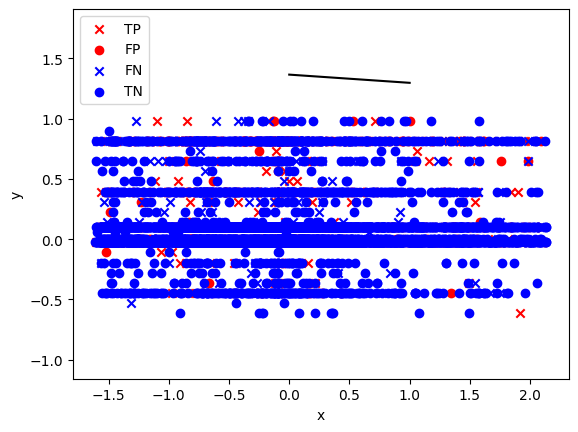

In [293]:
# training and avaluating the model
def train_eval_logistic(X_train, y_train, X_test, y_test, epochs_no, lr=0.01):
    (N, D) = X_train.shape
    w = np.random.randn(D)
    train_acc, test_acc = [], []
    train_nll, test_nll = [], []

    for epoch in range(epochs_no):
        Y_train = predict(X_train, w)
        train_nll.append(-np.mean(y_train * np.log(Y_train) + (1 - y_train) * np.log(1 - Y_train)))
        train_acc.append(np.mean((Y_train > 0.5) == y_train))

        Y_test = predict(X_test, w)
        test_nll.append(-np.mean(y_test * np.log(Y_test) + (1 - y_test) * np.log(1 - Y_test)))
        test_acc.append(np.mean((Y_test > 0.5) == y_test))

        w -= lr * np.dot(X_train.T, Y_train - y_train) / N

    return w, train_nll, test_nll, train_acc, test_acc


w, train_nll, test_nll, train_acc, test_acc = train_eval_logistic(X_train, y_train, X_test, y_test, lr=0.15, epochs_no=1500)
visualize_dataset(X_train[:, :-1], y_train, predict(X_train, w), w)

In [294]:
def calculate_plot_confusion_matrix(TARGET, PREDICTION, title):
    cm = confusion_matrix(TARGET, PREDICTION)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels = ['<=50K', '>50K'])
    disp.plot(cmap=plt.cm.Greens)
    plt.title(title)
    plt.show()
    return cm

In [295]:
results = {} # storing the results for each model

Train accuracy: 0.8183522940367546
Test accuracy: 0.8155


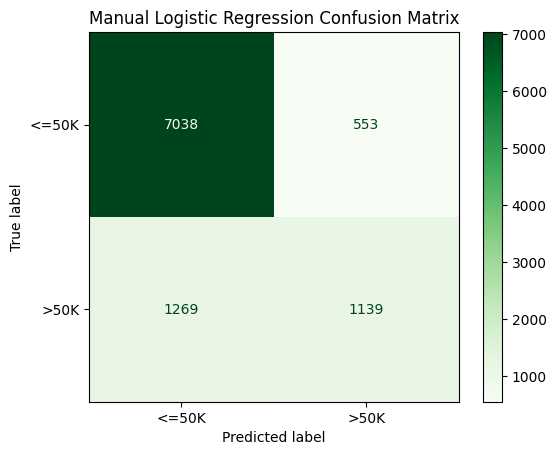

Precision: 0.6731678486997635
Recall: 0.4730066445182724
F1 score: 0.5556097560975609


In [296]:
#  predicting the test dataset
y_pred = predict(X, w)
y_pred = (y_pred > 0.5).astype(int)
print('Train accuracy:', train_acc[-1])
print('Test accuracy:', test_acc[-1])

manual_lr = calculate_plot_confusion_matrix(T, y_pred,  'Manual Logistic Regression Confusion Matrix')
precision = calculate_precision(manual_lr)
recall = calculate_recall(manual_lr)
f1_score = calculate_f1_score(manual_lr)

print('Precision:', precision)
print('Recall:', recall)
print('F1 score:', f1_score)

results['Manual Logistic Regression'] = {
    'Train accuracy': train_acc[-1],
    'Test accuracy': test_acc[-1],
    'Precision': precision,
    'Recall': recall,
    'F1 score': f1_score
}


Train accuracy: 0.8304788098512315
Test accuracy: 0.8295


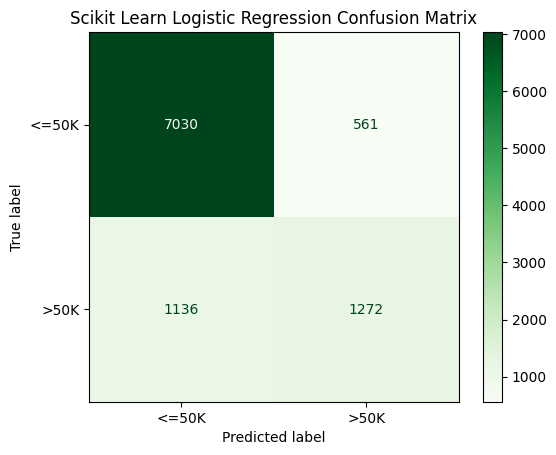

Precision: 0.6939443535188216
Recall: 0.5282392026578073
F1 score: 0.5998585239330345


In [297]:
# testing for scikit learn logistic regression
sk_model = SK_LogisticRegression(max_iter=1500, random_state=20).fit(X_train, y_train)
sk_model_pred = sk_model.predict(X)

print('Train accuracy:', sk_model.score(X_train, y_train))
print('Test accuracy:', sk_model.score(X_test, y_test))

sk_lr = calculate_plot_confusion_matrix(T, sk_model_pred, 'Scikit Learn Logistic Regression Confusion Matrix')
precision = calculate_precision(sk_lr)
recall = calculate_recall(sk_lr)
f1_score = calculate_f1_score(sk_lr)

print('Precision:', precision)
print('Recall:', recall)
print('F1 score:', f1_score)

results['Scikit Learn Logistic Regression'] = {
    'Train accuracy': sk_model.score(X_train, y_train),
    'Test accuracy': sk_model.score(X_test, y_test),
    'Precision': precision,
    'Recall': recall,
    'F1 score': f1_score
}



### MLP (Multi-layered Perceptron)

In [298]:
class Layer:
    '''base class for all neural network layers. It defines the interface that all derived layer classes must implement.'''

    def forward(self, x: np.ndarray) -> np.ndarray:
        '''compute the forward pass of the layer.
           Takes input x (a numpy array) and returns the transformed output.'''
        raise NotImplementedError
        
    def backward(self, x: np.ndarray, dy: np.ndarray) -> np.ndarray:
        '''compute the backward pass (i.e., gradients) of the layer.
           Takes input x and gradient dy with respect to the output,
           and returns the gradient with respect to the input.'''
        raise NotImplementedError
        
    def update(self, *args, **kwargs):
        '''update the layer's parameters.
           Takes variable arguments for flexibility.'''
        pass

In [299]:
class FeedForwardNetwork:
    '''represents a neural network composed of multiple layers.'''
    
    def __init__(self, layers: List[Layer]):
        self.layers = layers
        # List of layer objects that define the architecture of the network
        
    def forward(self, x: np.ndarray, train: bool = True) -> np.ndarray:
        self._inputs = []
        for layer in self.layers:
            if train:
                self._inputs.append(x)
            x = layer.forward(x)
        return x
    
    def backward(self, dy: np.ndarray) -> np.ndarray:
        for x, layer in zip(reversed(self._inputs), reversed(self.layers)):
            dy = layer.backward(x, dy)
        return dy
    
    def update(self, *args, **kwargs):
        for layer in self.layers:
            layer.update(*args, **kwargs)

In [300]:
class Linear(Layer):
    '''represents a fully connected layer in a neural network.'''
    
    def __init__(self, insize: int, outsize: int) -> None:
        bound = np.sqrt(6. / insize)
        self.weight = np.random.uniform(-bound, bound, (insize, outsize))
        self.bias = np.zeros((outsize,))
        
        self.dweight = np.zeros_like(self.weight)
        self.dbias = np.zeros_like(self.bias)
   
    def forward(self, x: np.ndarray) -> np.ndarray:
        self.x = x
        return np.dot(x, self.weight) + self.bias
    
    def backward(self, x: np.ndarray, dy: np.ndarray) -> np.ndarray:
        self.dweight = np.dot(self.x.T, dy)
        self.dbias = np.sum(dy, axis=0)
        return np.dot(dy, self.weight.T)
    
    def update(self, mode='SGD', lr=0.001, mu=0.9):
        if mode == 'SGD':
            self.weight -= lr * self.dweight
            self.bias -= lr * self.dbias
        else:
            raise ValueError('mode should be SGD, not ' + str(mode))

In [301]:
class ReLU(Layer):
    '''represents a ReLU (Rectified Linear Unit) activation layer.'''
    
    def __init__(self) -> None:
        pass
    
    def forward(self, x: np.ndarray) -> np.ndarray:
        return np.maximum(0, x)
    
    def backward(self, x: np.ndarray, dy: np.ndarray) -> np.ndarray:
        return dy * (x > 0)

In [302]:
class CrossEntropy:
    '''combines the softmax function and the cross-entropy loss.'''
    
    def __init__(self):
        pass
    
    def softmax(self, x):
        exps = np.exp(x)
        return exps / np.sum(exps,axis = 1).reshape(-1,1)

    def forward(self, y: np.ndarray, t: np.ndarray) -> float:
        self.y = y
        self.t = t
        self.p = self.softmax(y)
        return -np.mean(np.log(self.p[np.arange(len(t)), t]))
    
    def backward(self, y: np.ndarray, t: np.ndarray) -> np.ndarray:
        self.p = self.softmax(y)
        self.p[np.arange(len(t)), t] -= 1
        return self.p / len(t)


In [303]:
def accuracy(y: np.ndarray, t: np.ndarray) -> float:
    '''calculates the accuracy of the predictions.'''
    return np.mean(np.argmax(y, axis=1) == t)

Epoch 01 | Batch 062 | Train NLL:  0.814 | Train Acc:  74.60% | Test NLL:  0.737 | Test Acc: 75.75%
Epoch 02 | Batch 062 | Train NLL:  0.649 | Train Acc:  74.60% | Test NLL:  0.581 | Test Acc: 75.95%
Epoch 03 | Batch 062 | Train NLL:  0.586 | Train Acc:  74.60% | Test NLL:  0.523 | Test Acc: 76.70%
Epoch 04 | Batch 062 | Train NLL:  0.550 | Train Acc:  74.60% | Test NLL:  0.491 | Test Acc: 77.35%
Epoch 05 | Batch 062 | Train NLL:  0.525 | Train Acc:  76.19% | Test NLL:  0.470 | Test Acc: 77.60%
Epoch 06 | Batch 062 | Train NLL:  0.506 | Train Acc:  77.78% | Test NLL:  0.455 | Test Acc: 77.95%
Epoch 07 | Batch 062 | Train NLL:  0.490 | Train Acc:  80.95% | Test NLL:  0.443 | Test Acc: 78.95%
Epoch 08 | Batch 062 | Train NLL:  0.478 | Train Acc:  80.95% | Test NLL:  0.434 | Test Acc: 79.30%
Epoch 09 | Batch 062 | Train NLL:  0.468 | Train Acc:  80.95% | Test NLL:  0.426 | Test Acc: 79.40%
Epoch 10 | Batch 062 | Train NLL:  0.460 | Train Acc:  80.95% | Test NLL:  0.420 | Test Acc: 80.25%


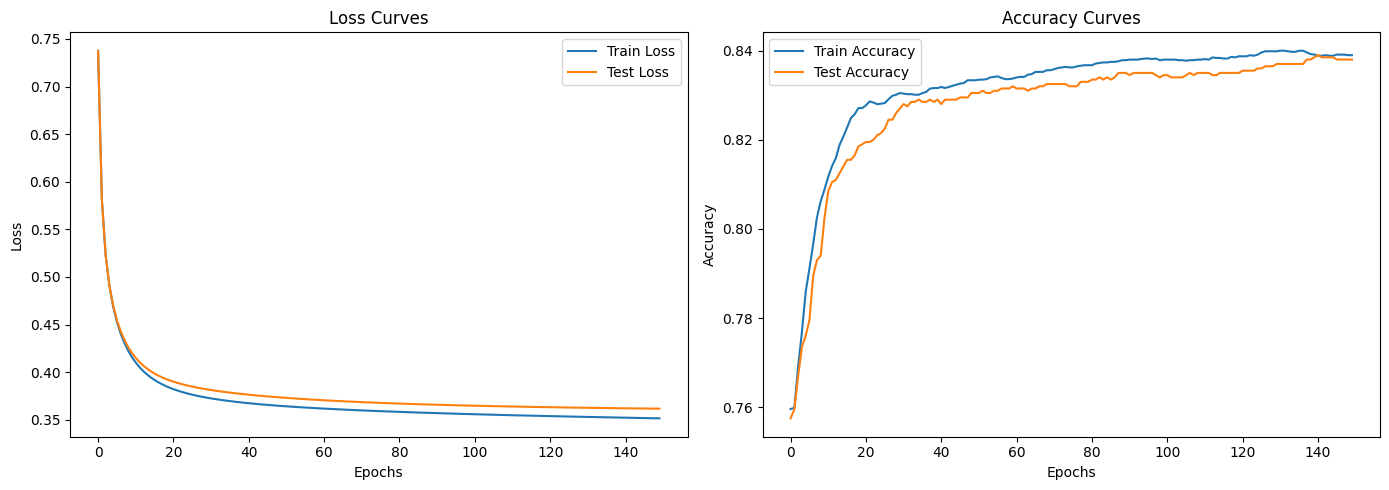

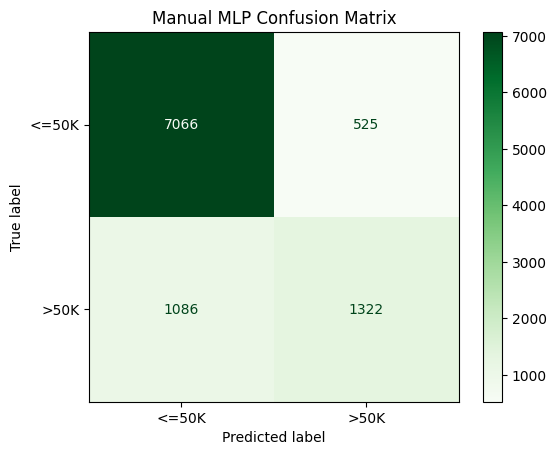

Precision: 0.715755278830536
Recall: 0.5490033222591362
F1 score: 0.6213866039952995


In [304]:
BATCH_SIZE = 128
HIDDEN_UNITS = 300
EPOCHS_NO = 150
optimize_args = {'mode': 'SGD', 'lr': .01}

net = FeedForwardNetwork([Linear(X_train.shape[1], HIDDEN_UNITS),
                          ReLU(),
                          Linear(HIDDEN_UNITS, 10)])
cost_function = CrossEntropy()
y_train = y_train.astype(int)
y_test = y_test.astype(int)

# used for pplotting the errors and accuracies for each epoch
train_losses = []
test_losses = []
train_accuracies = []
test_accuracies = []

for epoch in range(EPOCHS_NO):
    for b_no, idx in enumerate(range(0, len(X_train), BATCH_SIZE)):
        x = X_train[idx:idx + BATCH_SIZE, :]
        t = y_train[idx:idx + BATCH_SIZE]
    
        y = net.forward(x)
        loss = cost_function.forward(y, t)
        dy = cost_function.backward(y, t)
        net.backward(dy)

        net.update(**optimize_args)
        
        print(f'\rEpoch {epoch + 1:02d} '
            f'| Batch {b_no:03d} '
            f'| Train NLL: {loss:6.3f} '
            f'| Train Acc: {accuracy(y, t) * 100:6.2f}% ', end='')

    # train data
    y_train_pred = net.forward(X_train, train=False)
    train_loss = cost_function.forward(y_train_pred, y_train)
    train_acc = accuracy(y_train_pred, y_train)
    train_losses.append(train_loss)
    train_accuracies.append(train_acc)
    
    # test_data
    y_test_pred = net.forward(X_test, train=False)
    test_loss = cost_function.forward(y_test_pred, y_test)
    test_acc = accuracy(y_test_pred, y_test)
    test_losses.append(test_loss)
    test_accuracies.append(test_acc)
    
    print(f'| Test NLL: {test_loss:6.3f} '
          f'| Test Acc: {test_acc * 100:3.2f}%')

print()
print('Train accuracy:', accuracy(net.forward(X_train, train=False), y_train) * 100)
print('Test accuracy:', accuracy(net.forward(X_test, train=False), y_test) * 100)

# Plotting the curves
plt.figure(figsize=(14, 5))

# loss
plt.subplot(1, 2, 1)
plt.plot(train_losses, label='Train Loss')
plt.plot(test_losses, label='Test Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Loss Curves')
plt.legend()

# accuracy
plt.subplot(1, 2, 2)
plt.plot(train_accuracies, label='Train Accuracy')
plt.plot(test_accuracies, label='Test Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Accuracy Curves')
plt.legend()

plt.tight_layout()
plt.show()


manual_mlp = calculate_plot_confusion_matrix(T, np.argmax(net.forward(X, train=False), axis=1), 'Manual MLP Confusion Matrix')
precision = calculate_precision(manual_mlp)
recall = calculate_recall(manual_mlp)
f1_score = calculate_f1_score(manual_mlp)

print('Precision:', precision)
print('Recall:', recall)
print('F1 score:', f1_score)

results['Manual MLP'] = {
    'Train accuracy': accuracy(net.forward(X_train, train=False), y_train),
    'Test accuracy': accuracy(net.forward(X_test, train=False), y_test),
    'Precision': precision,
    'Recall': recall,
    'F1 score': f1_score
}

Train accuracy: 0.8942367795974496
Test accuracy: 0.8115


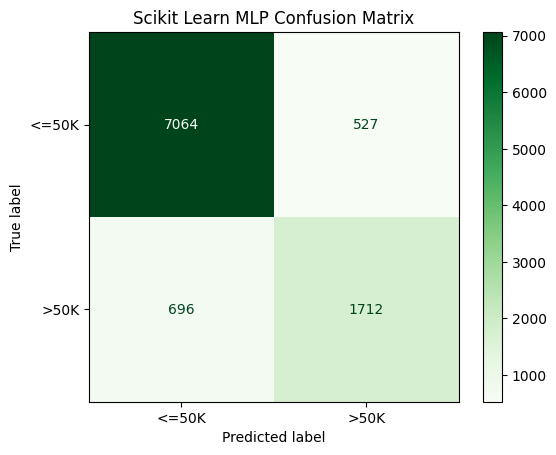

Precision: 0.7646270656543099
Recall: 0.7109634551495017
F1 score: 0.7368194534108027


In [305]:
# testing for scikit learn MLP
mlp_model = MLP_Classifier(hidden_layer_sizes=(300, 10), max_iter=1200, random_state=3, learning_rate='adaptive', learning_rate_init=0.02, solver='sgd')

'''‘adaptive’ keeps the learning rate constant to ‘learning_rate_init’ as long as training loss
keeps decreasing. Each time two consecutive epochs fail
to decrease training loss by at least tol, or fail to increase validation score 
by at least tol if ‘early_stopping’ is on, the current learning rate is divided by 5'''

mlp_model.fit(X_train, y_train)
mlp_model_pred = mlp_model.predict(X)

print('Train accuracy:', mlp_model.score(X_train, y_train))
print('Test accuracy:', mlp_model.score(X_test, y_test))

sk_mlp = calculate_plot_confusion_matrix(T, mlp_model_pred, 'Scikit Learn MLP Confusion Matrix')
precision = calculate_precision(sk_mlp)
recall = calculate_recall(sk_mlp)
f1_score = calculate_f1_score(sk_mlp)

print('Precision:', precision)
print('Recall:', recall)
print('F1 score:', f1_score)

results['Scikit Learn MLP'] = {
    'Train accuracy': mlp_model.score(X_train, y_train),
    'Test accuracy': mlp_model.score(X_test, y_test),
    'Precision': precision,
    'Recall': recall,
    'F1 score': f1_score
}

### Observing the Results

In [306]:
results_df = pd.DataFrame(results).T

def highlight_max(s):
    is_max = s == s.max()
    return ['color: green' if v else '' for v in is_max]

res = results_df.transpose()
res.style.apply(highlight_max, axis=1)

,Manual Logistic Regression,Scikit Learn Logistic Regression,Manual MLP,Scikit Learn MLP
Train accuracy,0.818352,0.830479,0.838980,0.894237
Test accuracy,0.815500,0.829500,0.838000,0.811500
Precision,0.673168,0.693944,0.715755,0.764627
Recall,0.473007,0.528239,0.549003,0.710963
F1 score,0.555610,0.599859,0.621387,0.736819
